In [1]:
# pip install torch

Epoch [10/1000], Loss: 2.8812
Epoch [20/1000], Loss: 2.5684
Epoch [30/1000], Loss: 2.2757
Epoch [40/1000], Loss: 2.0038
Epoch [50/1000], Loss: 1.7551
Epoch [60/1000], Loss: 1.5326
Epoch [70/1000], Loss: 1.3377
Epoch [80/1000], Loss: 1.1695
Epoch [90/1000], Loss: 1.0263
Epoch [100/1000], Loss: 0.9057
Epoch [110/1000], Loss: 0.8043
Epoch [120/1000], Loss: 0.7190
Epoch [130/1000], Loss: 0.6470
Epoch [140/1000], Loss: 0.5859
Epoch [150/1000], Loss: 0.5336
Epoch [160/1000], Loss: 0.4884
Epoch [170/1000], Loss: 0.4492
Epoch [180/1000], Loss: 0.4149
Epoch [190/1000], Loss: 0.3845
Epoch [200/1000], Loss: 0.3577
Epoch [210/1000], Loss: 0.3337
Epoch [220/1000], Loss: 0.3123
Epoch [230/1000], Loss: 0.2931
Epoch [240/1000], Loss: 0.2757
Epoch [250/1000], Loss: 0.2601
Epoch [260/1000], Loss: 0.2459
Epoch [270/1000], Loss: 0.2329
Epoch [280/1000], Loss: 0.2211
Epoch [290/1000], Loss: 0.2103
Epoch [300/1000], Loss: 0.2005
Epoch [310/1000], Loss: 0.1913
Epoch [320/1000], Loss: 0.1829
Epoch [330/1000],

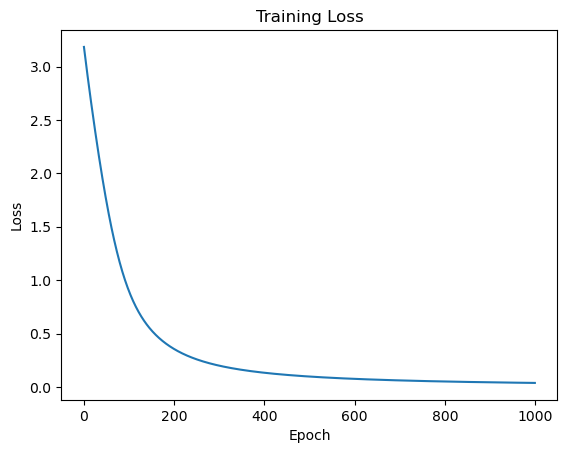

Accuracy: 97.50%


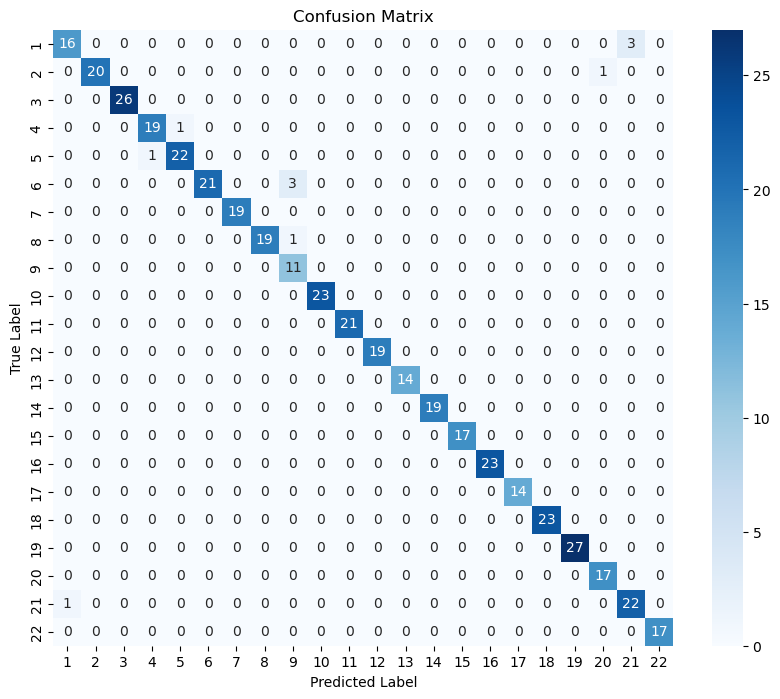

v_resp: [97.5, 2.5]


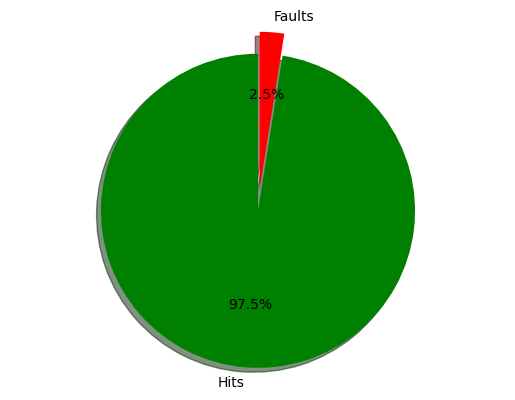

In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Crop_recommendation_numeric.csv")

# ensures that all features have a similar scale(data preprocessing)
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('label', axis=1).values)
y = df['label'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the dataset to PyTorch tensors( putting this data into a format that PyTorch understands and can work with efficiently)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define the neural network model
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)

# Instantiate the model
input_size = X_train.shape[1]
hidden_size = 128
output_size = len(df['label'].unique())
model = Model(input_size, hidden_size, output_size)

# Define loss function, optimizer, and learning rate
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 1000
train_losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())

    # Printing the training progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plotting training losss
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Evaluating the the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_test_tensor).sum().item()
    total = y_test_tensor.size(0)
    accuracy = (correct / total) * 100
    print(f'Accuracy: {accuracy:.2f}%')

    # plotting the confusion matrix
    cm = confusion_matrix(y_test_tensor.numpy(), predicted.numpy())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 23), yticklabels=range(1, 23))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

def accuracy_graphic(answer_graph):
    labels = ['Hits', 'Faults']
    sizes = answer_graph
    explode = (0, 0.14)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            colors=['green', 'red'], shadow=True, startangle=90)
    ax1.axis('equal')
    plt.show()

v_resp = []
correct = accuracy
incorrect = 100 - accuracy
v_resp.append(correct)
v_resp.append(incorrect)
print("v_resp:", v_resp)
accuracy_graphic(v_resp)